In [60]:
# Adjustments
input_directory = 'raw_frames_delay_500_gop_48'

Frames rendered in time: 114
Frames rendered late: 350
Average render time difference: 43.08 ms


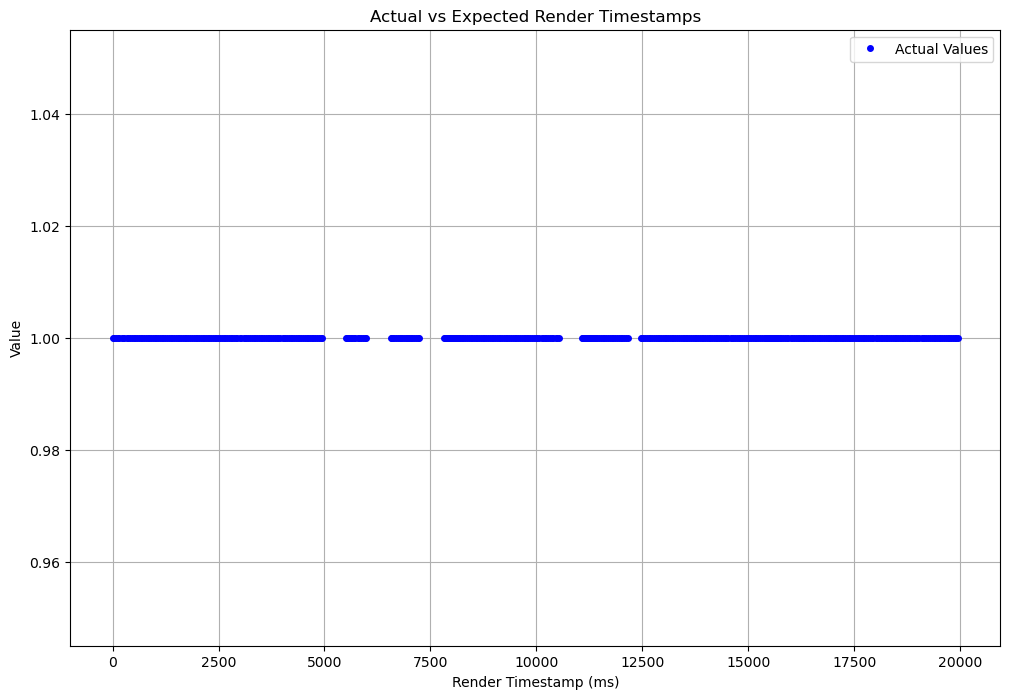

In [61]:
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil


# Initialize lists to store timestamps
timestamps = []

# Loop through the directory and extract timestamps from filenames
for filename in sorted(os.listdir(input_directory)):
    if filename.endswith('.raw'):
        # Extract the timestamp from the filename
        timestamp = int(filename.split('.')[0])
        timestamps.append(timestamp)

# Convert timestamps to numpy array
timestamps = np.array(timestamps)

# Subtract the first timestamp from all timestamps
timestamps_adjusted = timestamps - timestamps[0]

# Compute the differences between consecutive timestamps
time_differences = np.diff(timestamps_adjusted)

# Calculate the average time difference
average_time_difference = np.mean(time_differences)

# Create a constant value array (same length as timestamps)
constant_value = 1
values = np.full_like(timestamps_adjusted, constant_value)

# Calculate the expected frame interval for 24 FPS
fps = 24
frame_interval = 1000 / fps

# Generate expected timestamps
expected_timestamps = np.arange(0, timestamps_adjusted[-1] + frame_interval, frame_interval)
expected_values = np.full_like(expected_timestamps, constant_value)

# Count frames rendered in time
frames_rendered_in_time = 0
frames_rendered_late = 0
for index in range(len(timestamps_adjusted)):
    expected_time = expected_timestamps[index]
    actual_time = timestamps_adjusted[index]
    if actual_time <= expected_time:
        # print("In time", actual_time, expected_time)
        frames_rendered_in_time += 1
    else:
        # print("Late", actual_time, expected_time)
        frames_rendered_late += 1
print("Frames rendered in time:", frames_rendered_in_time)
print("Frames rendered late:", frames_rendered_late)


# Plot the actual and expected values
plt.figure(figsize=(12, 8))
plt.plot(timestamps_adjusted, values, 'o', label='Actual Values', color='blue', markersize=4)
# plt.plot(expected_timestamps, expected_values, 'o', label='Expected 24 FPS Values', color='red', markersize=0.1)
plt.xlabel('Render Timestamp (ms)')
plt.ylabel('Value')
plt.title('Actual vs Expected Render Timestamps')
plt.legend()
plt.grid(True)

# Print the average render time difference
print(f"Average render time difference: {average_time_difference:.2f} ms")

# plt.savefig(f'plots/actual-render-times-gop-48-idle.pdf', bbox_inches='tight')

In [62]:
# Configuration
output_directory = 'numbered_raw_frames'  # Path to store new .raw files
frame_rate = 24  # Frames per second
timestamp_interval = 1000 / frame_rate  # Interval in milliseconds
number_of_original_frames = 480

# Ensure output directory exists
os.makedirs(output_directory, exist_ok=True)

# List and sort original .raw files by timestamp
files = [f for f in os.listdir(input_directory) if f.endswith('.raw')]
files.sort(key=lambda f: int(f.split('.')[0]))

# Find the earliest timestamp
earliest_timestamp = int(files[0].split('.')[0])

# Normalize timestamps and rename files
normalized_files = []
for file in files:
    old_timestamp = int(file.split('.')[0])
    new_timestamp = old_timestamp - earliest_timestamp
    new_filename = f'{new_timestamp}.raw'
    normalized_files.append(new_filename)
    shutil.copy(os.path.join(input_directory, file), os.path.join(output_directory, new_filename))

print(f"Renamed and copied {len(normalized_files)} files.")

# Create a series of new files based on frame timestamps
current_time = 0
frame_number = 0

while frame_number < number_of_original_frames:
    # Find the latest file before or at the current timestamp
    closest_file = None
    for file in reversed(normalized_files):
        file_timestamp = int(file.split('.')[0])
        print(file_timestamp, current_time)
        if file_timestamp <= current_time:
            closest_file = file
            break
    
    if closest_file is None:
        break  # No more files to process

    # Construct output filename
    output_filename = f'frame-{frame_number}.raw'
    output_file_path = os.path.join(output_directory, output_filename)

    # Copy the closest file to the new series
    shutil.copy(os.path.join(output_directory, closest_file), output_file_path)
    
    # Move to the next timestamp
    current_time += timestamp_interval
    frame_number += 1

# Loop through the list and delete each file
for file_name in normalized_files:
    file_path = os.path.join(output_directory, file_name)
    
    try:
        if os.path.exists(file_path):
            os.remove(file_path)
            # print(f"Deleted: {file_path}")
        else:
            print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error deleting {file_path}: {e}")

print(f"Processed {frame_number} frames.")


Renamed and copied 464 files.
19948 0
19906 0
19866 0
19836 0
19788 0
19740 0
19701 0
19658 0
19619 0
19573 0
19531 0
19491 0
19450 0
19410 0
19370 0
19328 0
19283 0
19242 0
19204 0
19156 0
19121 0
19088 0
19035 0
18989 0
18951 0
18906 0
18867 0
18823 0
18782 0
18739 0
18697 0
18656 0
18618 0
18574 0
18539 0
18492 0
18452 0
18411 0
18367 0
18331 0
18284 0
18241 0
18204 0
18160 0
18120 0
18075 0
18038 0
18003 0
17948 0
17910 0
17873 0
17824 0
17785 0
17740 0
17703 0
17656 0
17616 0
17588 0
17537 0
17491 0
17447 0
17407 0
17365 0
17324 0
17292 0
17244 0
17204 0
17155 0
17120 0
17072 0
17038 0
16987 0
16948 0
16905 0
16873 0
16824 0
16779 0
16739 0
16700 0
16657 0
16620 0
16575 0
16535 0
16492 0
16447 0
16408 0
16365 0
16322 0
16280 0
16240 0
16205 0
16163 0
16118 0
16072 0
16032 0
16003 0
15947 0
15906 0
15864 0
15822 0
15780 0
15741 0
15710 0
15678 0
15664 0
15642 0
15627 0
15611 0
15598 0
15576 0
15558 0
15543 0
15530 0
15511 0
15496 0
15481 0
15466 0
15453 0
15440 0
15428 0
15409 0
15

In [63]:
### Received video frames just stitched together ###

# # Configuration
# output_directory = 'numbered_raw_frames'  # Path to store new .raw files
# frame_rate = 24  # Frames per second
# timestamp_interval = 1000 / frame_rate  # Interval in milliseconds
# number_of_original_frames = 240

# # Ensure output directory exists
# os.makedirs(output_directory, exist_ok=True)

# # List and sort original .raw files by timestamp
# files = [f for f in os.listdir(input_directory) if f.endswith('.raw')]
# files.sort(key=lambda f: int(f.split('.')[0]))

# # Normalize timestamps and rename files
# normalized_files = []
# for index, file in enumerate(files):
#     old_timestamp = int(file.split('.')[0])
#     new_filename = f'frame-{index}.raw'
#     normalized_files.append(new_filename)
#     shutil.copy(os.path.join(input_directory, file), os.path.join(output_directory, new_filename))

# print(f"Renamed and copied {len(normalized_files)} files.")